### Import des Bibliothéques
---

In [46]:
import pandas as pd
import os
import plotly.express as px
from sqlalchemy import create_engine, text
from dotenv import load_dotenv

### Chargement fichier .env
---

In [47]:
load_dotenv("secrets.env")

neon_conn = os.getenv("NEON_CONN")

### Connexion base de données Neon
---

In [48]:
neon_conn = os.getenv("NEON_CONN")
engine = create_engine(neon_conn)


### Top 5 des destinations ou il fait le plus chaud
---

In [ ]:
# requete top 5 des villes les + chaudes avec un ciel degage ou peu nuageux
sql=""" 
SELECT
    nom_ville,
    latitude,
    longitude,
    condition_meteo,
    AVG(temperature) AS temp_moy
FROM meteo
JOIN villes ON meteo.id_ville = villes.id_ville
WHERE condition_meteo IN ('ciel degagé', 'peu nuageux')
GROUP BY nom_ville, latitude, longitude, condition_meteo 
order BY temp_moy DESC 
LIMIT 5;
"""
# executer la requete et créer un df
df_top5_ville=pd.read_sql(sql,engine) 

df_top5_ville.head()

,nom_ville,latitude,longitude,condition_meteo,temp_moy
0,Marseille,43.296174,5.369953,peu nuageux,23.0
1,Cassis,43.214036,5.539632,peu nuageux,22.0
2,Montauban,44.017584,1.354999,peu nuageux,22.0
3,Toulouse,43.604464,1.444243,peu nuageux,21.5
4,Uzes,44.012128,4.419672,peu nuageux,21.0


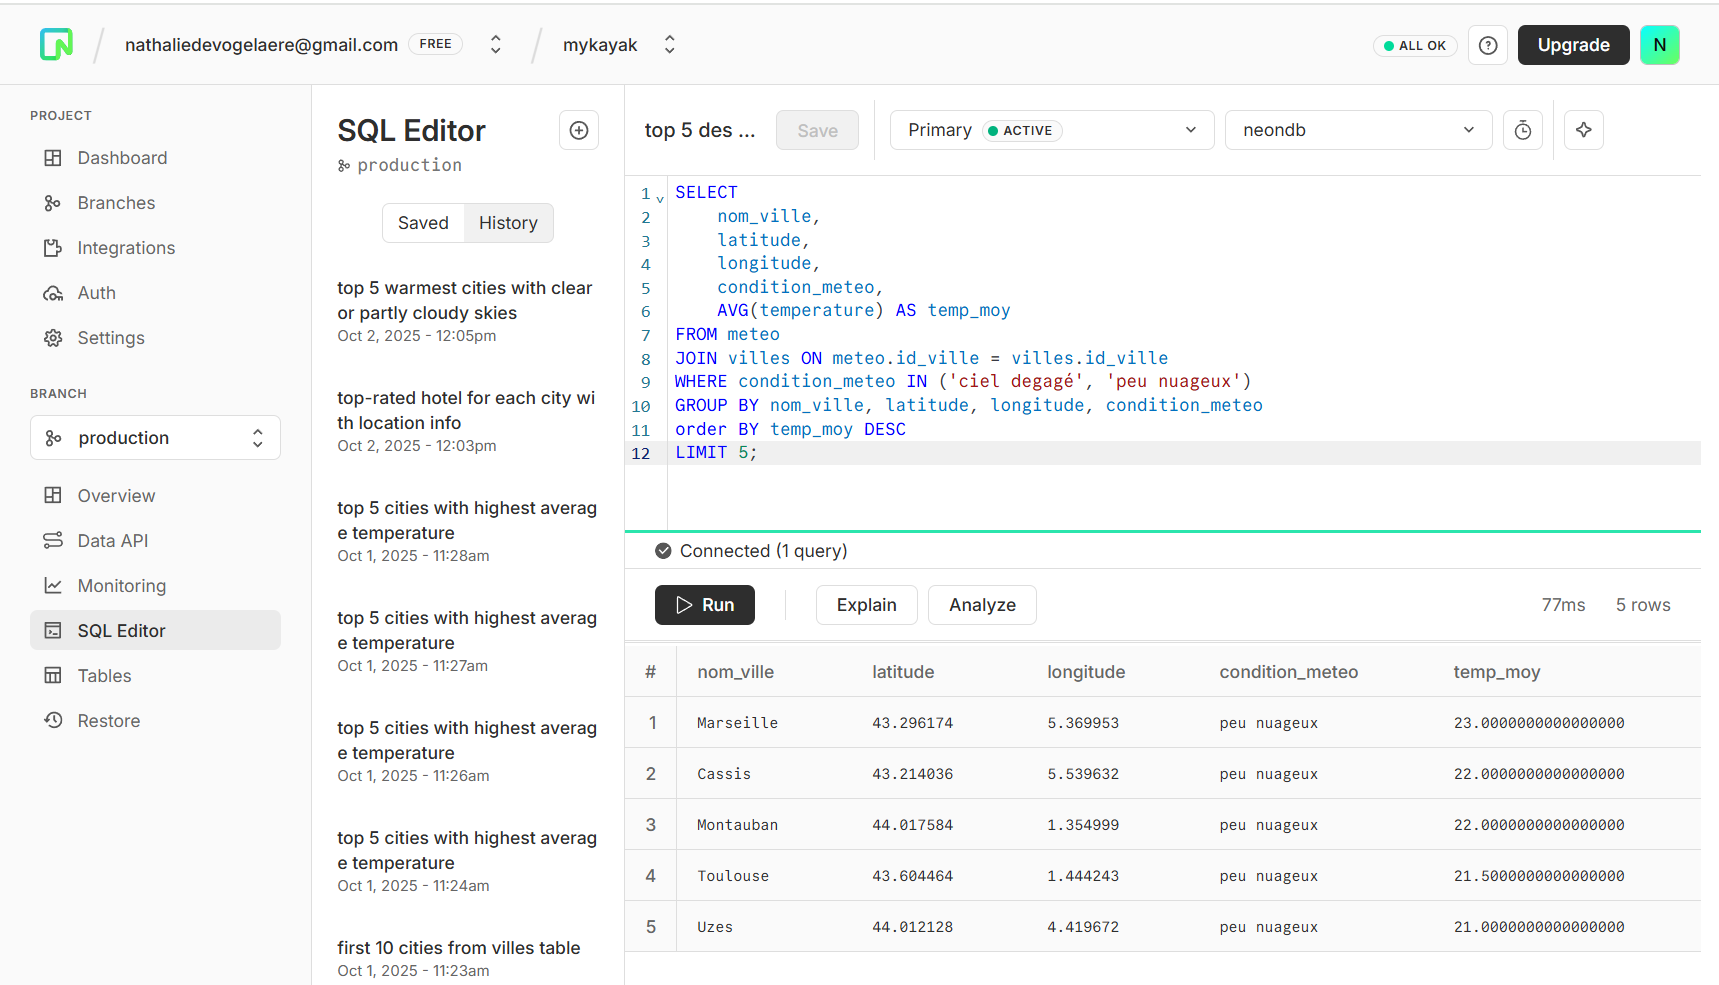

In [34]:
# carte plotly
fig=px.scatter_map(
    df_top5_ville,
    lat='latitude',
    lon='longitude',
    size='temp_moy',
    color='temp_moy',
    hover_name='nom_ville',
    title="Top 5 des destinations les plus chaudes",
    zoom=5
)
fig.show()

### Top 20 des hotels 
---

In [ ]:
# requete top 20 des hotels (1 par ville)
# ROW_NUMBER : attribut un rang à cq hotel ds sa ville
sql=""" 
WITH top20_hotel AS (
    SELECT
        id_ville,
        name,
        score,
        ROW_NUMBER() OVER (PARTITION BY id_ville ORDER BY score DESC) AS rang 
    FROM hotels
    )    
SELECT 
    t.name,
    v.nom_ville,
    v.latitude,
    v.longitude,
    t.score AS meilleur_score
FROM top20_hotel t
JOIN villes v ON t.id_ville = v.id_ville
WHERE t.rang = 1
LIMIT 20;
    """
# executer la requete et créer un df
df_top20_hotel=pd.read_sql(sql,engine) 

df_top20_hotel.head(20)

,name,nom_ville,latitude,longitude,meilleur_score
0,La Greve Saint Michel,Mont Saint Michel,48.635954,-1.511460,8.9
1,Le Petit Matin,Bayeux,49.276462,-0.702474,9.4
2,JOST Hôtel Le Havre Centre Gare,Le Havre,49.493898,0.107973,8.6
3,Hyatt Place Rouen,Rouen,49.440459,1.093966,8.6
4,Hotel La Lanterne & Spa By Timhotel,Paris,48.853495,2.348392,8.8
5,Plein centre- 90m Cathédrale - 2ch - 4 couchag...,Amiens,49.894171,2.295695,9.2
6,OKKO Hotels Lille Centre,Lille,50.636565,3.063528,8.6
7,BOMA easy living hotel,Strasbourg,48.584614,7.750713,8.8
8,Lo'Gîte L'Allée du Val,Chateau du Haut Koenigsbourg,48.249411,7.344320,9.4
9,Colmar Hotel,Colmar,48.077752,7.357964,9.0


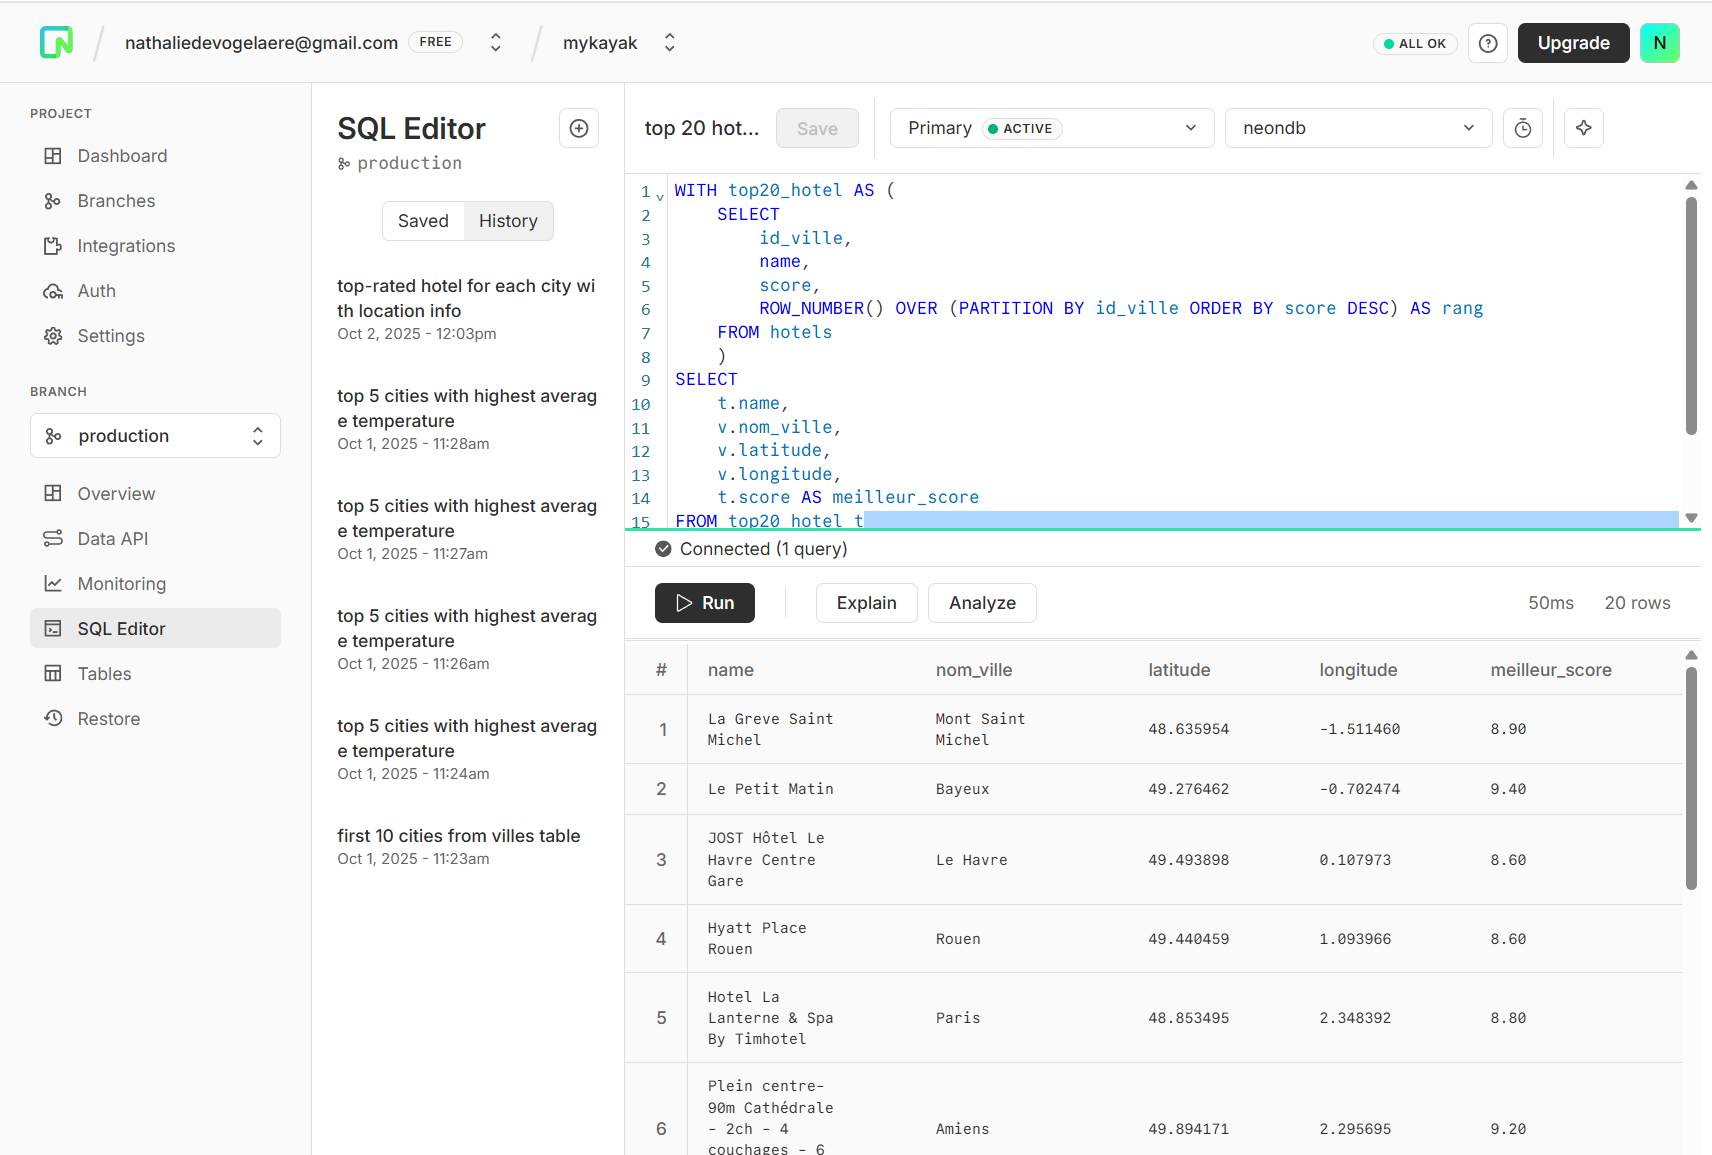

In [60]:
# carte plotly
fig=px.scatter_map(
    df_top20_hotel,
    lat='latitude',
    lon='longitude',
    size='meilleur_score',
    color='meilleur_score',
    hover_name='nom_ville',
    title="Top 20 des meilleurs Hotels",
    zoom=5
)

fig.show()